In [ ]:
!pip install -r requirements.txt

In [61]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Importing the UCI Mushroom Data Set, stored as 'uci_mushrooms.csv' 
mush_df = pd.read_csv('data/uci_mushrooms.csv')

# Reviewing the data, each attribute column contains the label that are encoded with strings 
mush_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [62]:
# Preprocessing steps before inputting date to model

def preprocess_data(df: pd.DataFrame, target_col_name: str) -> tuple[pd.DataFrame, pd.Series]:
    """
    Preprocesses the data if it's not encoded as numeric to work with sklearn.
    Specify the target column name.

    Parameters
    ----------
    df (pd.DataFrame): The input DataFrame.
    target_col_name (str): The name of the target column.

    Returns
    -------
    tuple[pd.DataFrame, pd.Series]: A tuple contianing the features DataFrame (X) and the target Series (y).
    """

    # Convert string columns to numeric if detected
    for col in df.columns:
        if df[col].dtype == 'object':
            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col])

    # Separate features and target
    X = df.drop(columns=[target_col_name]) # Features (all except the 'class' column)
    y = df[target_col_name]

    return X, y

In [63]:
X, y = preprocess_data(df=mush_df, target_col_name='class')
# Now the features should be encoded into numerical representation
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


### Spliting training /testing data
- Specify random state to 1. guarantee that the same data split will be generated every time when the code is run. 2. Ensure consistency when evaluating across multiple models.

In [64]:
# Spliting train /test data and assign to global variables so they can be accessed by multiple models
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### DecisionTree


In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class DecisionTree:

    def __init__(self, max_depth: int = None, min_samples_split: int = None) -> None:
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.clf = DecisionTreeClassifier()
        self.clf.fit(X_train, y_train) # Assuming X_train, y_train exist as global variables

    def get_model_evaluation(self):

        # Evaluation Metric 1: Accuracy
        print('Accuracy of Decision Tree classifier on training set: %.2f%%' % (self.clf.score(X_train, y_train) * 100))
        print('Accuracy of Decision Tree classifier on test set: %.2f%%' % (self.clf.score(X_test, y_test) * 100))

        # Evaluation Metric 2: Print classification report with Precision, Recall, and F1-Score
        y_pred = self.clf.predict(X_test)
        print(classification_report(y_test, y_pred, target_names=['not 1', '1']) )

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=self.clf.classes_)
        disp.plot()
        plt.title('Confusion Matrix of Decision Tree Classifier')
        plt.show()


    def get_feature_importance(self):

        # Return the feature importance
        feature_importance = self.clf.feature_importances_
        # Get the feature names
        feature_names = self.clf.feature_names_in_

        # Add assertion to ensure we get the same count of feature importance and feature names
        assert len(feature_importance) == len(feature_names)

        # Combining the feature names with their importance
        feature_w_importance = pd.Series(feature_importance, index=feature_names)

        # Plot the Decision Tree
        plt.figure(figsize = (15, 10))
        plot_tree(self.clf, feature_names=feature_names, class_names=self.clf.classes_.astype(str), filled=True, rounded=True, fontsize=10)
        plt.show()

        return feature_w_importance



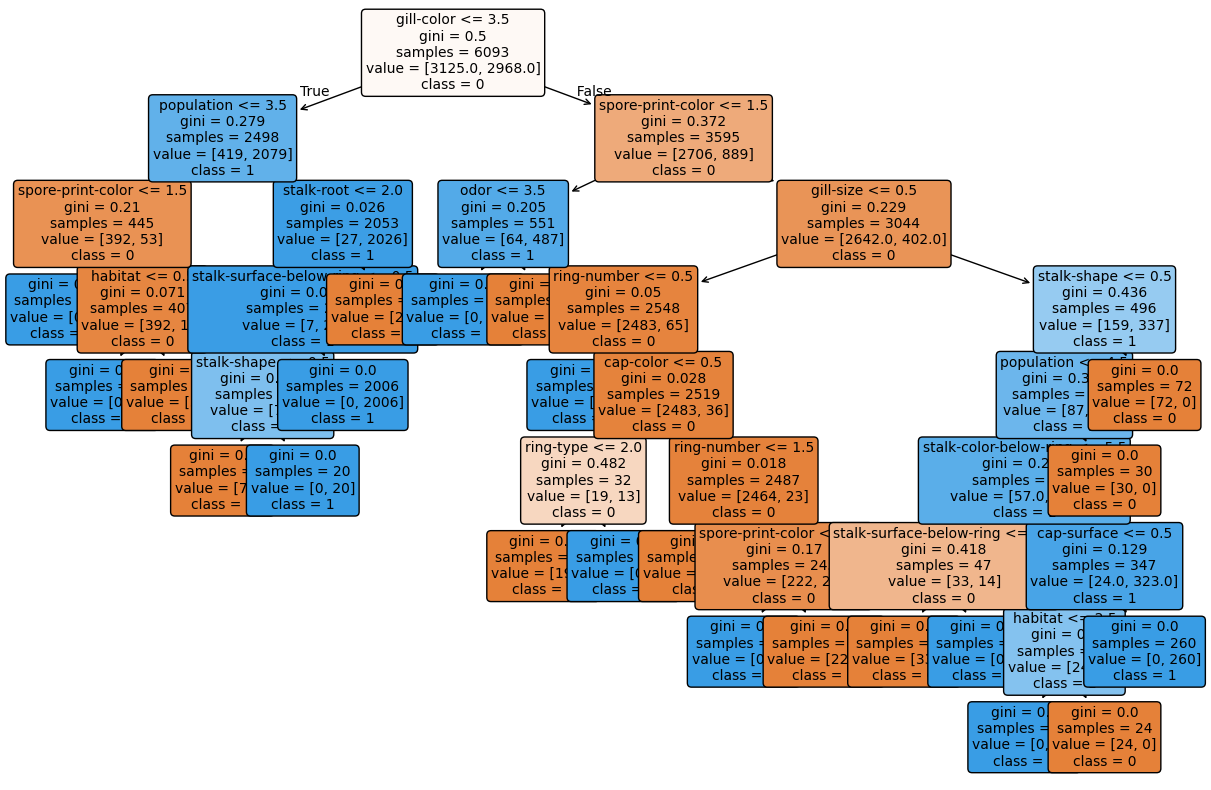

List of Top 5 Features Sorted by Importance in Descending Order: 
gill-color           0.331327
spore-print-color    0.208092
population           0.194307
gill-size            0.116630
odor                 0.037160
dtype: float64


In [66]:
dt = DecisionTree()
decisiontree_feature_importance = dt.get_feature_importance()
# Display the top 5 features sorted by importance in descending order
top_5_features = decisiontree_feature_importance.sort_values(ascending=False).head()

print(f"List of Top 5 Features Sorted by Importance in Descending Order: \n{top_5_features}")

Accuracy of Decision Tree classifier on training set: 100.00%
Accuracy of Decision Tree classifier on test set: 100.00%
              precision    recall  f1-score   support

       not 1       1.00      1.00      1.00      1083
           1       1.00      1.00      1.00       948

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



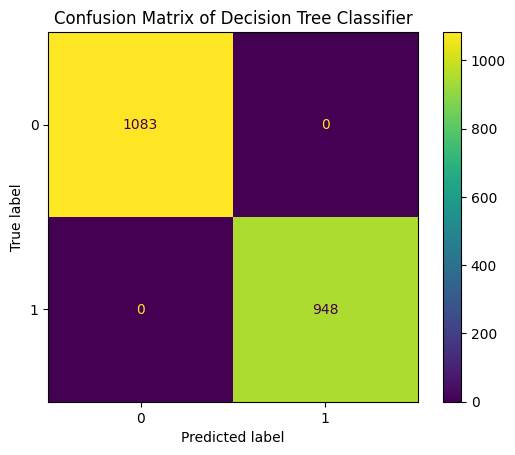

In [67]:
dt.get_model_evaluation()
